In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class perceptron(object):
    """ perceptron classifier
    
    parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 0.1)
    n_iter : int
        Passes over the training datasets
    
    Attribute
    ---------
    w_ : 1d-array
        Weight after fitting
    errors_ : list
        Number of missclassification in every epoch
        
    """
    
    def __init__(self,eta=0.01,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self,X,y):
        """Fit training data
        
        Parameters
        ----------
        X : {array-like},shape = [n_samples,n_features]
            Training vector,where n_samples
            is the number of samples and
            n_features is the number of features/
        y : array-like ,shape =[n_samples]
            Target value.
            
        Returns
        -------
        self,object
        
        """
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta*(target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
        return self
        
    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X,self.w_[1:])+self.w_[0]
        
    def predict(self,X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >=0.0,1,-1)                              


In [3]:
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

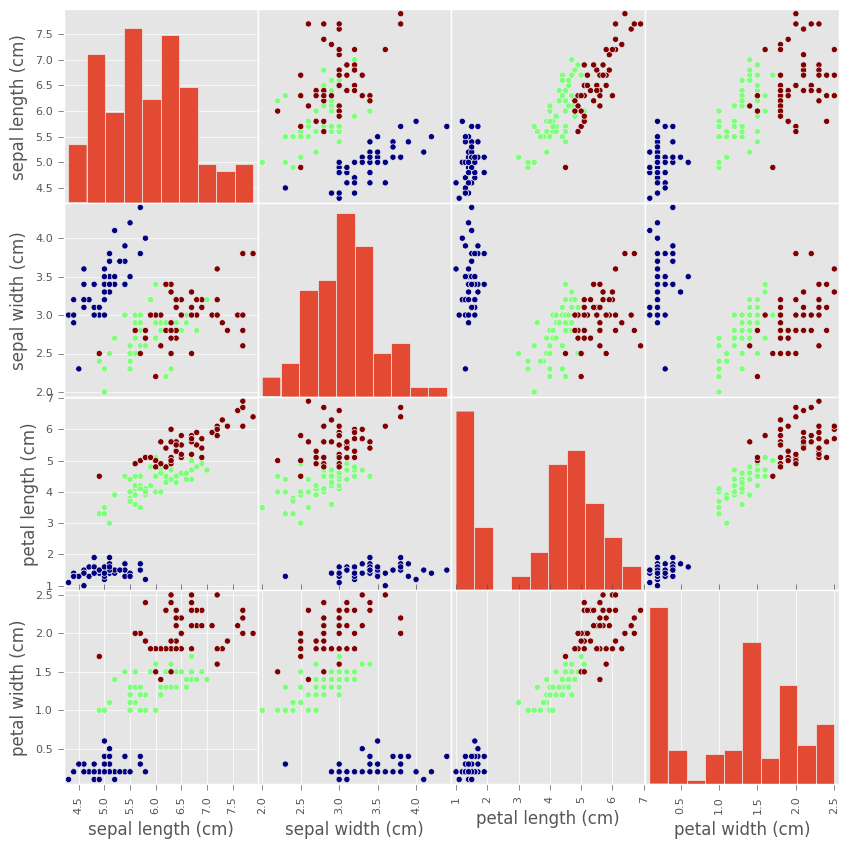

In [15]:
X = iris.data
y= iris.target
df = pd.DataFrame(X,columns = iris.feature_names)
plt.style.use('ggplot')
pd.scatter_matrix(df,c = y,figsize=(10,10),alpha=1,marker = '@')
plt.show()


In [6]:
y = np.where(y==0,-1,1)[0:100]
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


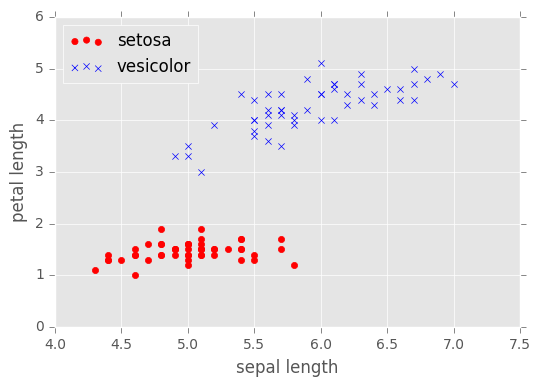

In [16]:
df.columns = [0,1,2,3]
df.head()
#considering only setosa and versicolor,with feature as sepal length and petal length
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1],marker = 'o',color = 'red',label = 'setosa')
plt.scatter(X[50:100,0],X[50:100,1],marker = 'x',color = 'blue',label = 'vesicolor')
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc = 'upper left')

plt.show()

## now its time to train the perceptron algorithm

In [9]:
ppn = perceptron(eta = 0.01,n_iter = 10)

In [10]:
ppn.fit(X,y)

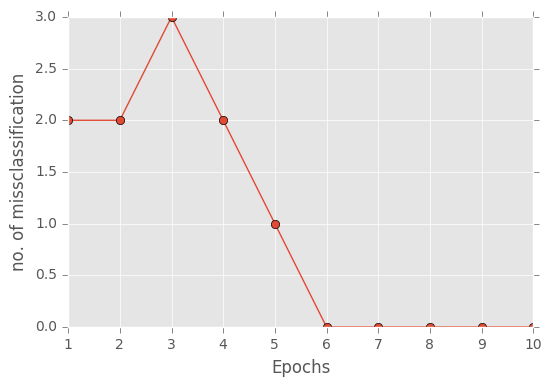

In [11]:
#lets plot the no. of missclassified points of each epoch
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker= 'o')
plt.xlabel('Epochs')
plt.ylabel("no. of missclassification")
plt.savefig("misclassfic.png")
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_region(X,y,classifier,resolution = 0.02):
    
    #setup marker generator and color map
    markers = ['^','x']
    colors = ['red','green','lightgreen','gray','cyan']
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plotting the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)   
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.2,cmap = cmap)
    plt.xlim(xx1.min() ,xx1.max())
    plt.ylim(xx2.min() ,xx2.max())                     
    
    #plot class sample
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],marker = markers[idx],alpha = 0.8,label = cl,color = colors[idx])


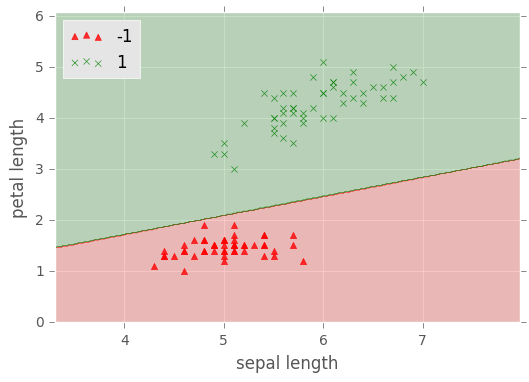

In [13]:
plot_decision_region(X,y,classifier = ppn)
plt.legend(loc = 'upper left')
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.savefig("perceptron2.png")

plt.show()

In [17]:
#weighy after training the perceptron
ppn.w_

array([-0.04 , -0.068,  0.182])